In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'C:\Users\lyxkg\Desktop\yuxi-liu-wired.github.io\blog\posts\wigner-rotation':
  os.chdir(r'C:\Users\lyxkg\Desktop\yuxi-liu-wired.github.io\blog\posts\wigner-rotation')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


C:\Users\lyxkg\AppData\Local\Temp\ipykernel_30476\3628115105.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"C:\\Users\\lyxkg\\miniconda3\\Lib\\importlib\\_bootstrap.py": 1692878958.0, "C:\\Users\\lyxkg\\miniconda3\\Lib\\importlib\\_bootstrap_external.py": 1692878958.0, "C:\\Users\\lyxkg\\miniconda3\\Lib\\zipimport.py": 1692878958.0, "C:\\Users\\lyxkg\\miniconda3\\Lib\\codecs.py": 1692878958.0, "C:\\Users\\lyxkg\\miniconda3\\Lib\\encodings\\aliases.py": 1692878958.0, "C:\\Users\\lyxkg\\miniconda3\\Lib\\encodings\\__init__.py": 1692878958.0, "C:\\Users\\lyxkg\\miniconda3\\Lib\\encodings\\utf_8.py": 1692878958.0, "C:\\Users\\lyxkg\\miniconda3\\Lib\\encodings\\cp1252.py": 1692878958.0, "C:\\Users\\lyxkg\\miniconda3\\Lib\\abc.py": 1692878958.0, "C:\\Users\\lyxkg\\miniconda3\\Lib\\io.py": 1692878958.0, "C:\\Users\\lyxkg\\miniconda3\\Lib\\stat.py": 1692878958.0, "C:\\Users\\lyxkg\\miniconda3\\Lib\\_collections_abc.py": 1692878958.0, "C:\\Users\\lyxkg\\miniconda3\\Lib\\genericpath.py": 1692878958.0, "C:\\Users\\lyxkg\\miniconda3\\Lib\\ntpath.py": 1692878958.0, "C:\\Users\\lyxkg\\miniconda3\\Lib\\o

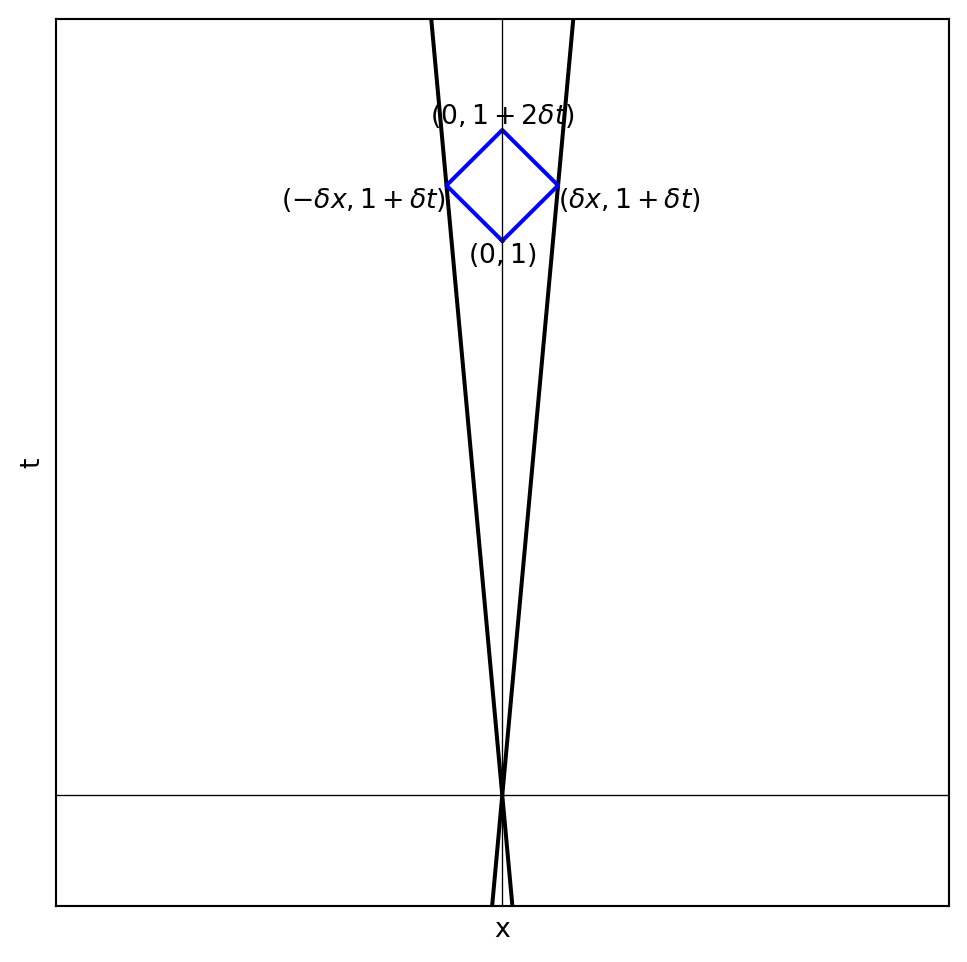

In [2]:
#| label: three-infinitesimal-boosts
#| echo: false
#| fig-cap: Three infinitesimal boosts
import matplotlib.pyplot as plt
import numpy as np

delta_t = 0.1
delta_x = 0.1

point_A = (0, 1)
point_B = (delta_x, 1 + delta_t)
point_C = (0, 1 + 2 * delta_t)
point_D = (-delta_x, 1 + delta_t)
origin = (0, 0)

plt.figure(figsize=(6, 6))
slope_B = (point_B[1] - origin[1]) / (point_B[0] - origin[0])
x_inf_B = np.array([-1, 1])
y_inf_B = slope_B * (x_inf_B - origin[0]) + origin[1]
slope_D = (point_D[1] - origin[1]) / (point_D[0] - origin[0])
x_inf_D = np.array([-1, 1])
y_inf_D = slope_D * (x_inf_D - origin[0]) + origin[1]
plt.plot(x_inf_B, y_inf_B, 'k-', label='Extended Line to $(\delta x, 1 + \delta t)$')
plt.plot(x_inf_D, y_inf_D, 'k-', label='Extended Line to $(-\delta x, 1 + \delta t)$')

plt.plot(*zip(*[point_A, point_B, point_C, point_D, point_A]), 'b-')

plt.text(*point_A, '$(0, 1)$', verticalalignment='top', horizontalalignment='center')
plt.text(*point_B, '$(\delta x, 1 + \delta t)$', verticalalignment='top', horizontalalignment='left')
plt.text(*point_C, '$(0, 1 + 2 \delta t)$', verticalalignment='bottom', horizontalalignment='center')
plt.text(*point_D, '$(-\delta x, 1 + \delta t)$', verticalalignment='top', horizontalalignment='right')
plt.xticks([]),plt.yticks([])

plt.xlim(-0.8, 0.8)
plt.ylim(-0.2, 1.4)
plt.xlabel('x')
plt.ylabel('t')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
plt.show()